In [38]:
pip install imbalanced-learn

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc

from sklearn.tree import plot_tree


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.utils import resample

from imblearn.combine import SMOTEENN

from sklearn.svm import SVC

In [40]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1_2024/main/Datasets/Employee_Attrition_Data_Set.csv")

In [41]:
df.describe()

,Employee ID,Age,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,40.561200,8948.750300,14.311100,1.958300,10.022797,26.632481,5.407000,2.992900
std,2886.89568,10.876483,3473.354793,8.742572,1.426171,5.823696,14.396393,2.943504,1.410833
min,1.00000,22.000000,3000.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2500.75000,31.000000,5895.000000,7.000000,1.000000,5.101189,14.509275,3.000000,2.000000
50%,5000.50000,41.000000,8982.500000,14.000000,2.000000,9.990978,27.122930,5.000000,3.000000
75%,7500.25000,50.000000,11928.250000,22.000000,3.000000,15.042273,39.148606,8.000000,4.000000
max,10000.00000,59.000000,14999.000000,30.000000,5.000000,20.000000,50.000000,10.000000,5.000000


In [42]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employee ID            10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Job Role               10000 non-null  object 
 4   Department             10000 non-null  object 
 5   Monthly Income         10000 non-null  int64  
 6   Years at Company       10000 non-null  int64  
 7   Number of Promotions   10000 non-null  int64  
 8   Last Raise Percentage  10000 non-null  float64
 9   Distance from Office   10000 non-null  float64
 10  Job Satisfaction       10000 non-null  int64  
 11  Performance Rating     10000 non-null  int64  
 12  Attrition              10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


# Data cleaning

In [44]:
df.isnull().sum()


Employee ID              0
Age                      0
Gender                   0
Job Role                 0
Department               0
Monthly Income           0
Years at Company         0
Number of Promotions     0
Last Raise Percentage    0
Distance from Office     0
Job Satisfaction         0
Performance Rating       0
Attrition                0
dtype: int64

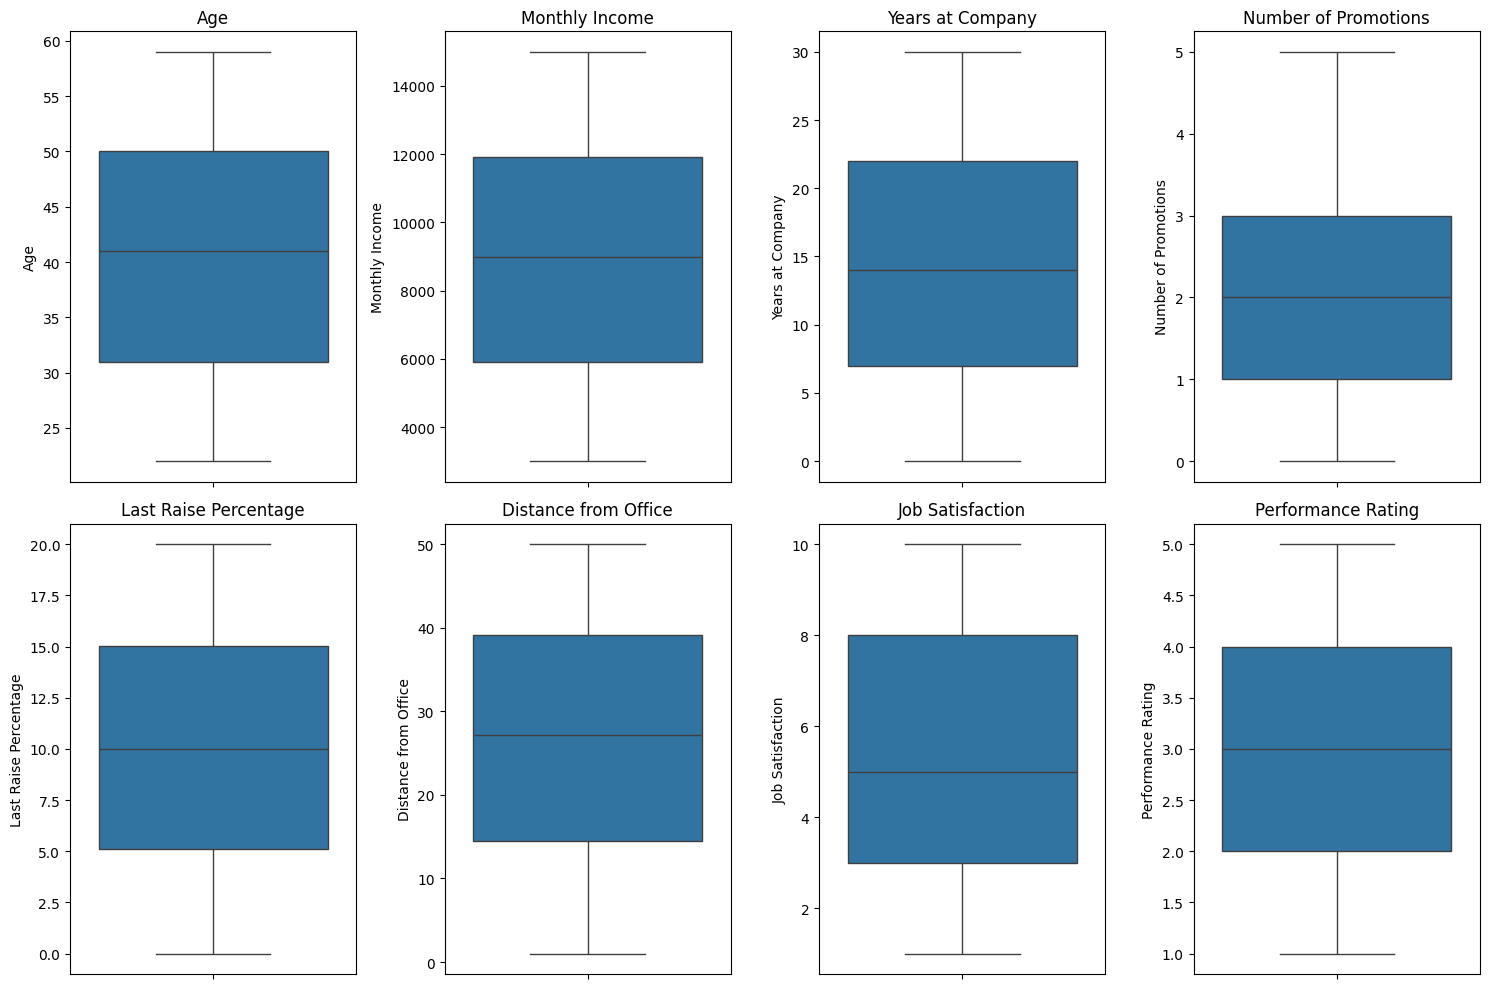

In [45]:
# 绘制数值特征的箱线图
numeric_features = ['Age', 'Monthly Income', 'Years at Company', 'Number of Promotions', 'Last Raise Percentage', 'Distance from Office', 'Job Satisfaction', 'Performance Rating']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [46]:
from scipy.stats import zscore

# 计算数值特征的Z-Score
z_scores = df[numeric_features].apply(zscore)

# 检测离群值
outliers = (z_scores.abs() > 3).any(axis=1)
print("离群值数量：", outliers.sum())
print(df[outliers])


离群值数量： 0
Empty DataFrame
Columns: [Employee ID, Age, Gender, Job Role, Department, Monthly Income, Years at Company, Number of Promotions, Last Raise Percentage, Distance from Office, Job Satisfaction, Performance Rating, Attrition]
Index: []


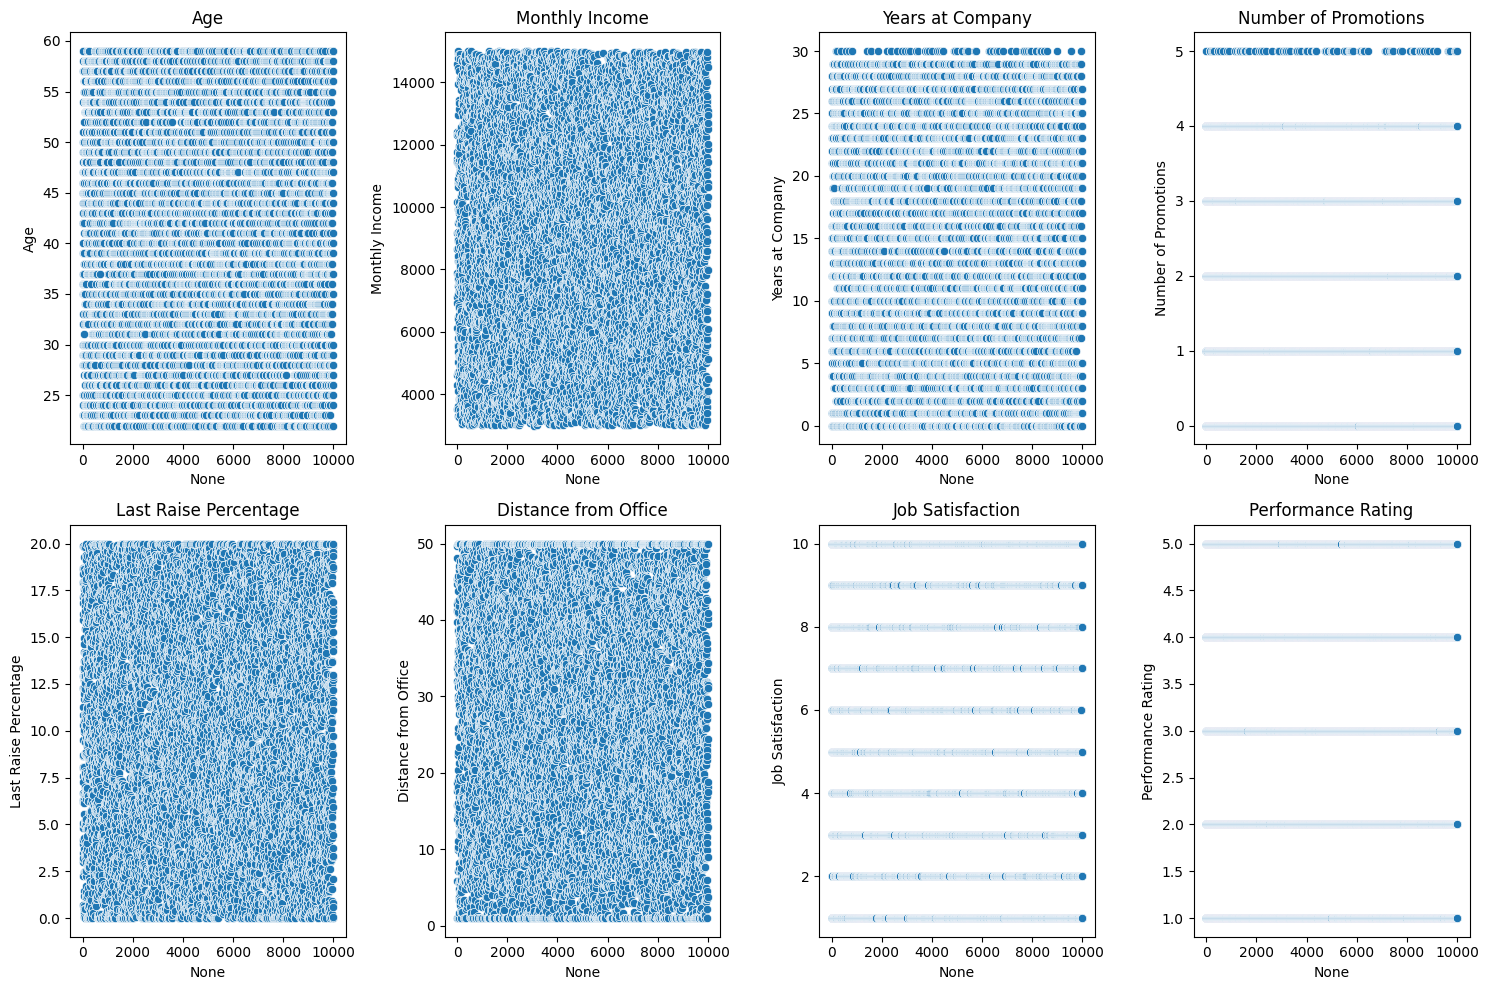

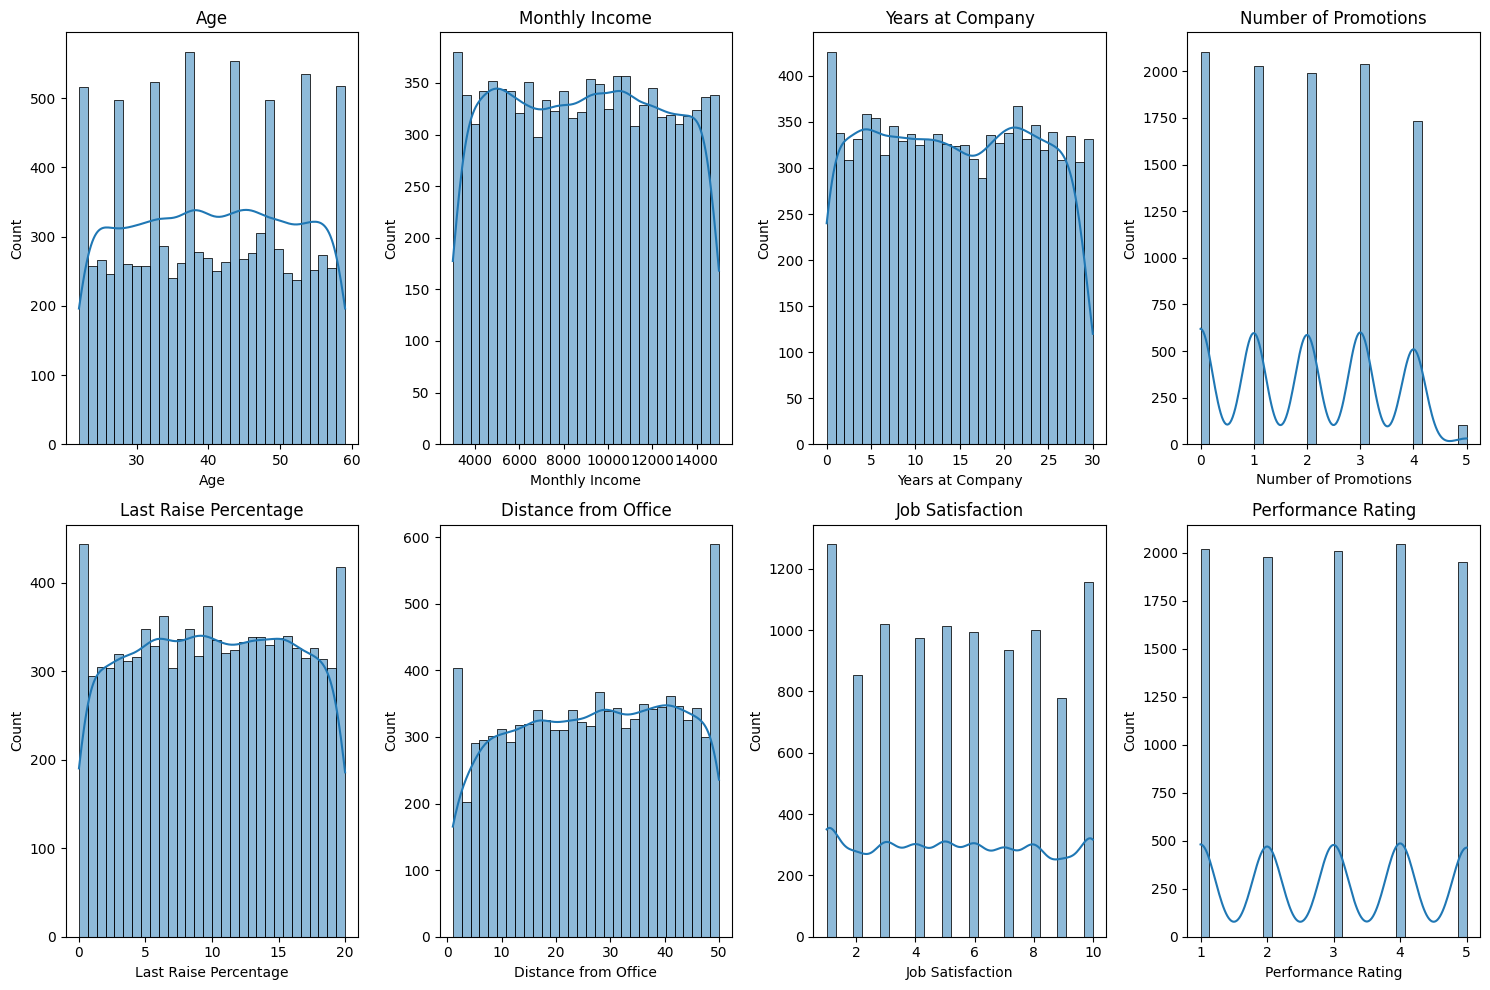

In [47]:
# 绘制数值特征的散点图
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=df, x=df.index, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

# 绘制数值特征的直方图
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


# EDA


In [48]:
df.head()

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No


/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/1925022850.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Number of Promotions', data=df, ax=ax1, palette='tab10')
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/1925022850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Years at Company', data=df, ax=ax2, palette='tab10')
/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/1925022850.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job

<Axes: xlabel='Job Satisfaction', ylabel='Last Raise Percentage'>

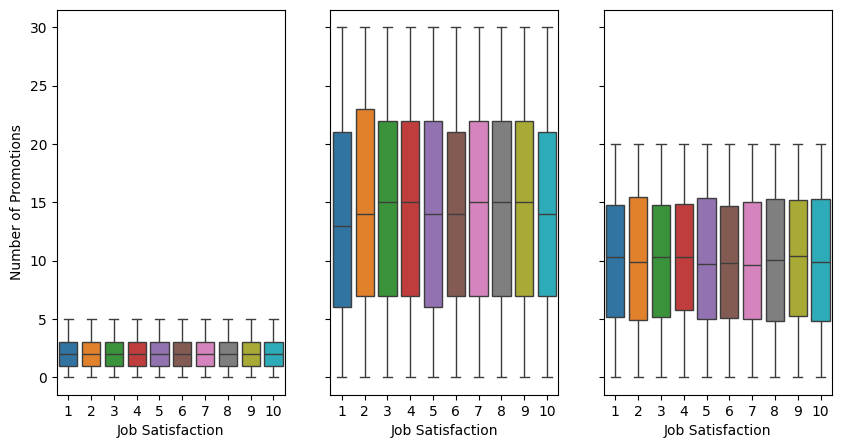

In [49]:
# 满意度和别的关系
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,5), sharey=True)
sns.boxplot(x='Job Satisfaction', y='Number of Promotions', data=df, ax=ax1, palette='tab10')
sns.boxplot(x='Job Satisfaction', y='Years at Company', data=df, ax=ax2, palette='tab10')
sns.boxplot(x='Job Satisfaction', y='Last Raise Percentage', data=df, ax=ax3, palette='tab10')

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/2572671232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df, palette='tab10')


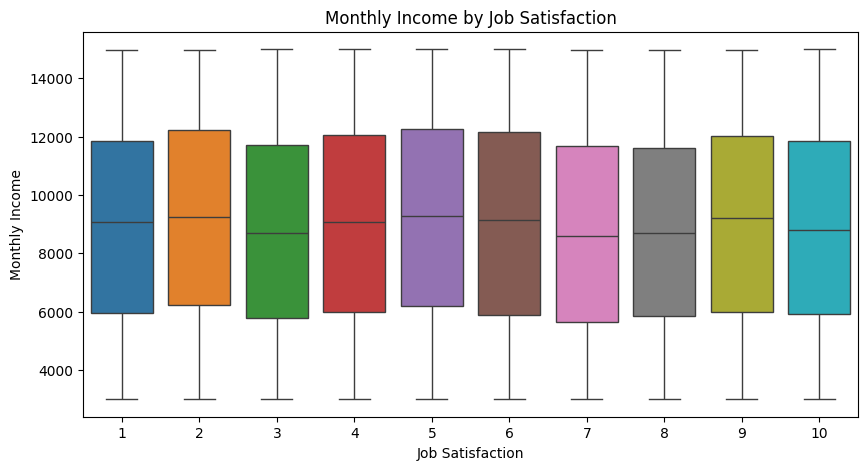

In [50]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Monthly Income', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/811519790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Performance Rating', data=df, palette='tab10')


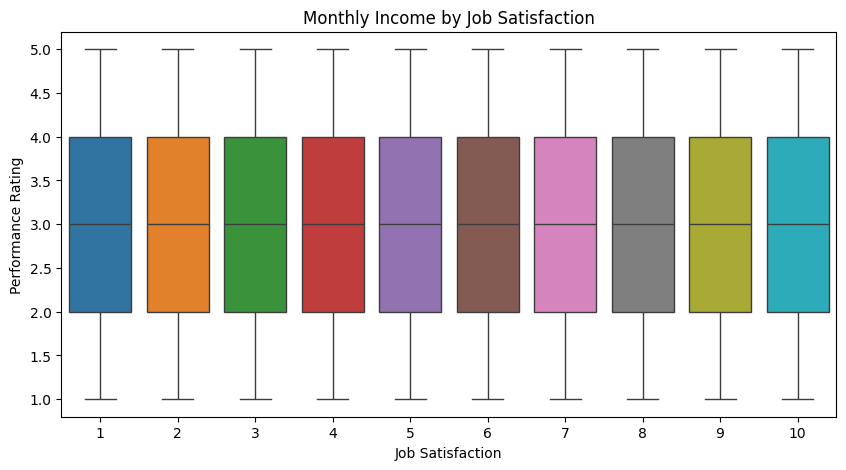

In [51]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Performance Rating', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/3850252916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Distance from Office', data=df, palette='tab10')


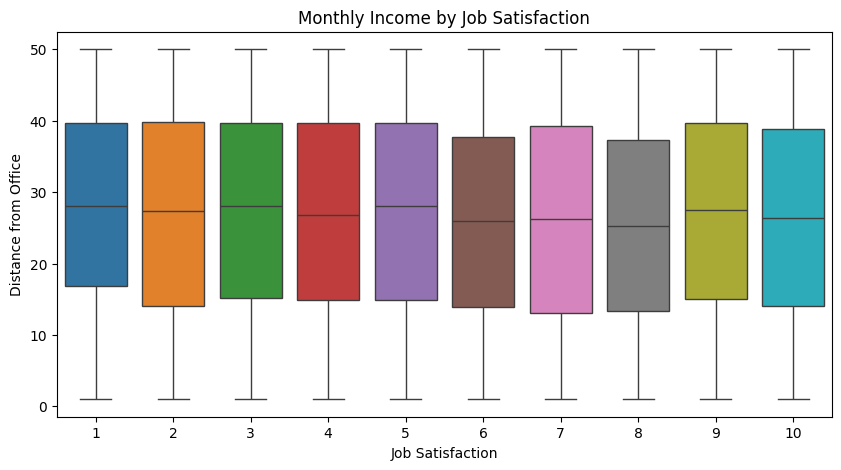

In [52]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Distance from Office', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/3729050174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Satisfaction', y='Age', data=df, palette='tab10')


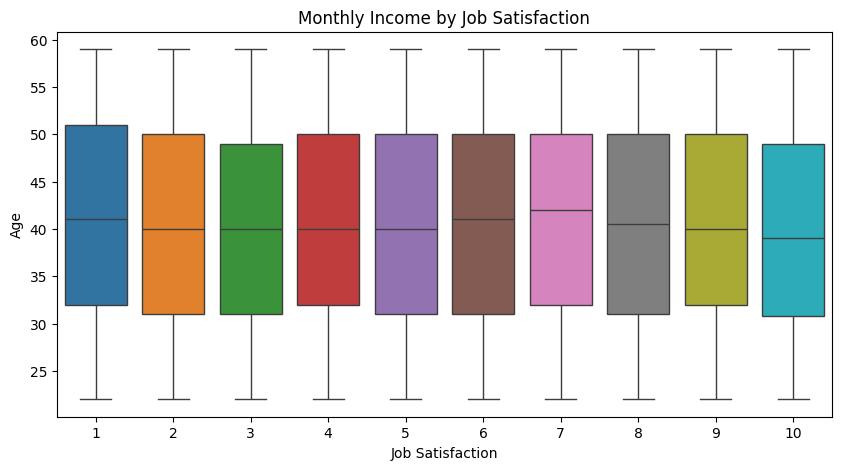

In [53]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Job Satisfaction', y='Age', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

In [54]:
df[df['Job Role']== 'HR']['Job Satisfaction'].describe()

count    2025.000000
mean        5.411358
std         2.946186
min         1.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Job Satisfaction, dtype: float64

/var/folders/dt/wzt2_nrs77vgrsp6wgvfx7d00000gn/T/ipykernel_5466/1912646857.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Last Raise Percentage', y='Monthly Income', data=df, palette='tab10')


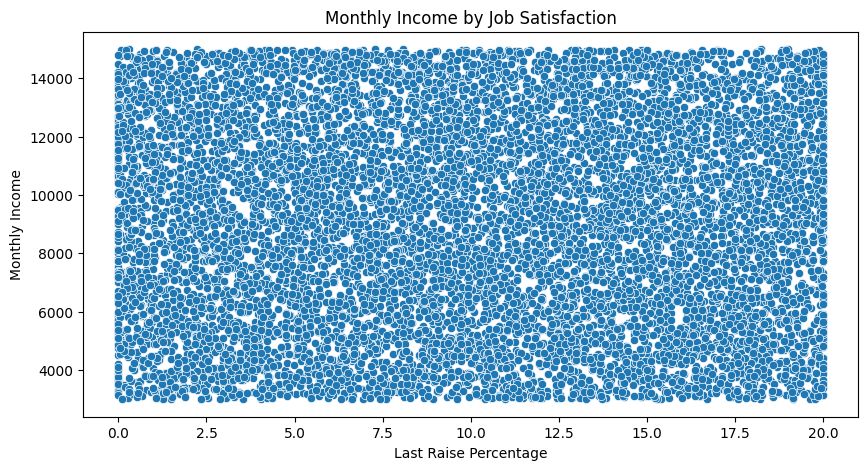

In [55]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Last Raise Percentage', y='Monthly Income', data=df, palette='tab10')
plt.title('Monthly Income by Job Satisfaction')
plt.show()

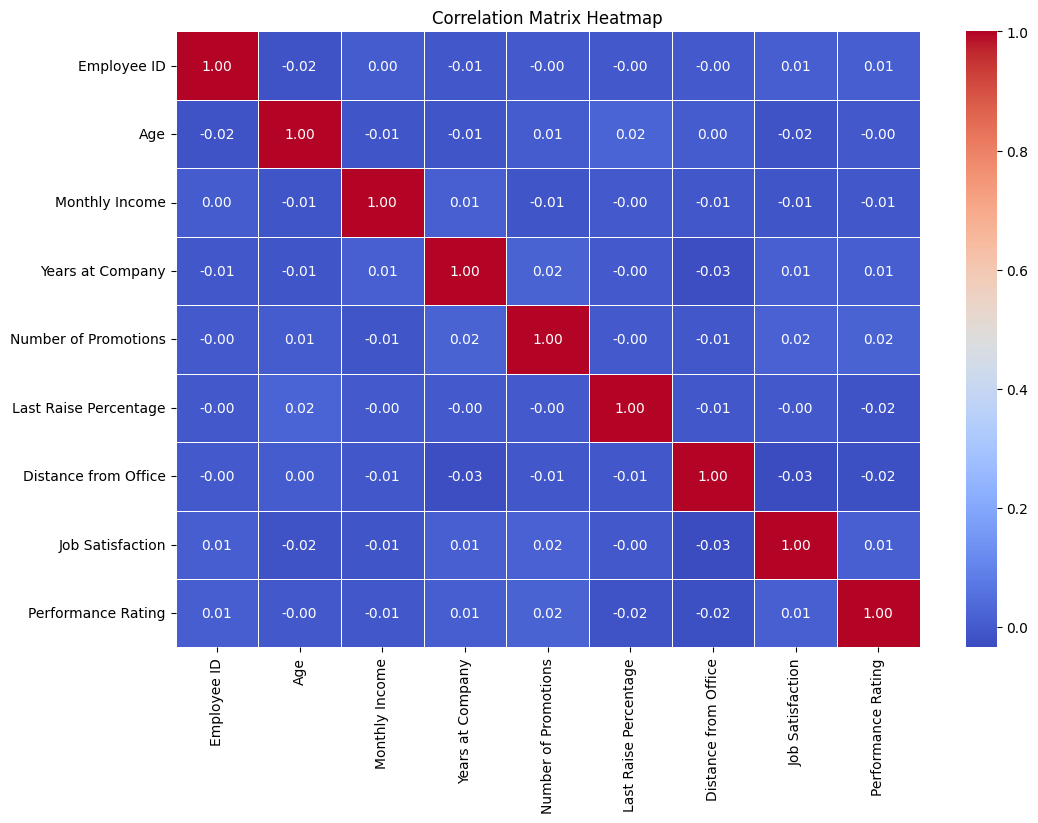

In [56]:

# 删除不需要的列
df_h = df.drop(['Gender', 'Job Role', 'Department','Attrition'], axis=1)

# 计算相关性矩阵
correlation_matrix = df_h.corr()

# 绘制热图
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: xlabel='Gender'>

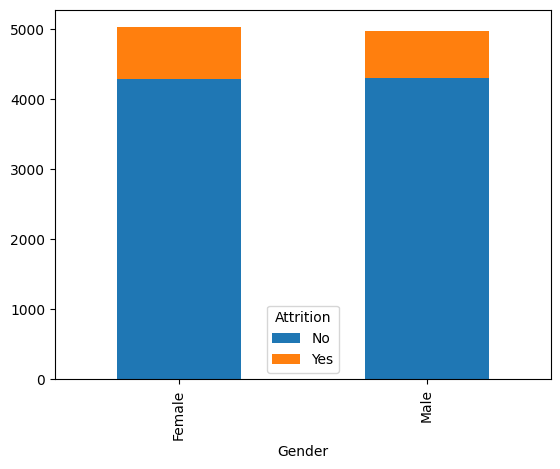

In [57]:
df.groupby(['Gender','Attrition'])['Age'].count().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Gender'>

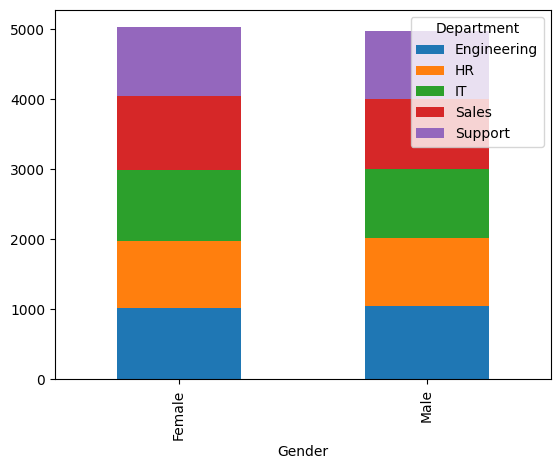

In [58]:
df.groupby(['Gender','Department'])['Age'].count().unstack().plot(kind='bar', stacked=True)

# Feature Engineering

In [59]:
df['Job Role'].unique()

array(['HR', 'Sales', 'Technician', 'Engineer', 'Manager'], dtype=object)

In [60]:
df['Department'].unique()

array(['IT', 'Support', 'HR', 'Sales', 'Engineering'], dtype=object)

In [61]:
df

,Employee ID,Age,Gender,Job Role,Department,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,Attrition
0,1,50,Male,HR,IT,11547,12,1,12.288783,41.307654,9,1,No
1,2,36,Male,Sales,Support,8643,28,4,3.496371,44.733204,8,1,Yes
2,3,29,Male,Technician,HR,12418,12,4,4.796945,18.646876,1,3,No
3,4,42,Male,Technician,Support,11441,25,1,10.310471,15.790848,8,4,No
4,5,40,Female,Engineer,Sales,9178,25,2,6.210127,41.239179,6,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,Female,Sales,Sales,6079,19,0,16.867011,34.311711,7,1,Yes
9996,9997,41,Female,Sales,HR,12946,11,2,19.361893,9.009338,2,1,No
9997,9998,35,Female,Technician,Engineering,12700,1,0,0.029159,12.949511,1,1,No
9998,9999,53,Male,Engineer,Support,12013,21,3,2.106378,50.000000,4,4,No


In [62]:
# 将 Job Satisfaction 分成 'low' 和 'high'
df['Job Satisfaction Level'] = df['Job Satisfaction'].apply(lambda x: 'low' if x <= 5 else 'high')

In [63]:
# 将 Job Satisfaction Level 列转换为二进制变量
df['Job Satisfaction Level'] = df['Job Satisfaction Level'].map({'low': 0, 'high': 1})

df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [64]:
# Select the categorical variables that need to be converted into dummy variables
cat_col = ['Job Role', 'Department']

# Convert categorical variables into dummy variables
df_final = pd.get_dummies(df, columns=cat_col, drop_first=False, dtype=int)

df_final

,Employee ID,Age,Gender,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,...,Job Role_Engineer,Job Role_HR,Job Role_Manager,Job Role_Sales,Job Role_Technician,Department_Engineering,Department_HR,Department_IT,Department_Sales,Department_Support
0,1,50,1,11547,12,1,12.288783,41.307654,9,1,...,0,1,0,0,0,0,0,1,0,0
1,2,36,1,8643,28,4,3.496371,44.733204,8,1,...,0,0,0,1,0,0,0,0,0,1
2,3,29,1,12418,12,4,4.796945,18.646876,1,3,...,0,0,0,0,1,0,1,0,0,0
3,4,42,1,11441,25,1,10.310471,15.790848,8,4,...,0,0,0,0,1,0,0,0,0,1
4,5,40,0,9178,25,2,6.210127,41.239179,6,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,26,0,6079,19,0,16.867011,34.311711,7,1,...,0,0,0,1,0,0,0,0,1,0
9996,9997,41,0,12946,11,2,19.361893,9.009338,2,1,...,0,0,0,1,0,0,1,0,0,0
9997,9998,35,0,12700,1,0,0.029159,12.949511,1,1,...,0,0,0,0,1,1,0,0,0,0
9998,9999,53,1,12013,21,3,2.106378,50.000000,4,4,...,1,0,0,0,0,0,0,0,0,1


In [65]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Employee ID             10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Gender                  10000 non-null  int64  
 3   Monthly Income          10000 non-null  int64  
 4   Years at Company        10000 non-null  int64  
 5   Number of Promotions    10000 non-null  int64  
 6   Last Raise Percentage   10000 non-null  float64
 7   Distance from Office    10000 non-null  float64
 8   Job Satisfaction        10000 non-null  int64  
 9   Performance Rating      10000 non-null  int64  
 10  Attrition               10000 non-null  int64  
 11  Job Satisfaction Level  10000 non-null  int64  
 12  Job Role_Engineer       10000 non-null  int64  
 13  Job Role_HR             10000 non-null  int64  
 14  Job Role_Manager        10000 non-null 

In [66]:
df_final.head()

,Employee ID,Age,Gender,Monthly Income,Years at Company,Number of Promotions,Last Raise Percentage,Distance from Office,Job Satisfaction,Performance Rating,...,Job Role_Engineer,Job Role_HR,Job Role_Manager,Job Role_Sales,Job Role_Technician,Department_Engineering,Department_HR,Department_IT,Department_Sales,Department_Support
0,1,50,1,11547,12,1,12.288783,41.307654,9,1,...,0,1,0,0,0,0,0,1,0,0
1,2,36,1,8643,28,4,3.496371,44.733204,8,1,...,0,0,0,1,0,0,0,0,0,1
2,3,29,1,12418,12,4,4.796945,18.646876,1,3,...,0,0,0,0,1,0,1,0,0,0
3,4,42,1,11441,25,1,10.310471,15.790848,8,4,...,0,0,0,0,1,0,0,0,0,1
4,5,40,0,9178,25,2,6.210127,41.239179,6,4,...,1,0,0,0,0,0,0,0,1,0


In [67]:
df_final.columns

Index(['Employee ID', 'Age', 'Gender', 'Monthly Income', 'Years at Company',
       'Number of Promotions', 'Last Raise Percentage', 'Distance from Office',
       'Job Satisfaction', 'Performance Rating', 'Attrition',
       'Job Satisfaction Level', 'Job Role_Engineer', 'Job Role_HR',
       'Job Role_Manager', 'Job Role_Sales', 'Job Role_Technician',
       'Department_Engineering', 'Department_HR', 'Department_IT',
       'Department_Sales', 'Department_Support'],
      dtype='object')

In [68]:
df_final = df_final.drop(columns=['Job Satisfaction'])

# logistic

In [69]:
X = df_final.drop(columns=['Attrition'])  # Feature variables
y = df_final['Attrition']  # Target variable

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# 创建并训练逻辑回归模型
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# 预测
y_pred_logreg = logreg_model.predict(X_test)

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

Confusion Matrix:
[[1720    4]
 [ 276    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1724
           1       0.00      0.00      0.00       276

    accuracy                           0.86      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.74      0.86      0.80      2000


Accuracy Score:
0.86


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


在分类报告中，每一行代表一个类别的评估指标。对于你的数据集，报告中的每一行对应两个类别：0 和 1。让我们逐行解释报告中的内容：

- **precision（精确率）**：预测为某一类别的样本中，实际为该类别的比例。
- **recall（召回率）**：实际为某一类别的样本中，被正确预测为该类别的比例。
- **f1-score（F1得分）**：精确率和召回率的调和平均数，是综合考虑精确率和召回率的指标。
- **support（支持度）**：每个类别的实际样本数。

具体解释：

- **0 类别**（假设为不流失用户）：
  - **precision**: 0.86，即模型预测为 0 的样本中，有 86% 是实际为 0。
  - **recall**: 1.00，即实际为 0 的样本中，100% 被正确预测为 0。
  - **f1-score**: 0.92，即精确率和召回率的调和平均数。
  - **support**: 1724，即实际为 0 的样本数。

- **1 类别**（假设为流失用户）：
  - **precision**: 0.00，即模型预测为 1 的样本中，没有一个是实际为 1。
  - **recall**: 0.00，即实际为 1 的样本中，没有一个被正确预测为 1。
  - **f1-score**: 0.00，即精确率和召回率的调和平均数为 0。
  - **support**: 276，即实际为 1 的样本数。

- **accuracy（准确率）**：整体准确率为 0.86，即在所有样本中有 86% 被正确预测。

- **macro avg（宏平均）**：对每个类别的精确率、召回率和 F1 得分取平均。
  - **precision**: 0.43
  - **recall**: 0.50
  - **f1-score**: 0.46

- **weighted avg（加权平均）**：对每个类别的精确率、召回率和 F1 得分按支持度加权取平均。
  - **precision**: 0.74
  - **recall**: 0.86
  - **f1-score**: 0.80

综上所述，报告显示模型在预测类别 0（不流失用户）时表现很好，但在预测类别 1（流失用户）时表现很差。这可能是由于类别不平衡导致的，类别 1 的样本数量较少，因此模型在预测类别 1 时表现不佳。可以尝试以下方法来改善：

1. **进一步平衡数据**：尝试不同的平衡方法，如只使用 SMOTE 或采用其他技术。
2. **调整模型参数**：进一步调整模型的参数，尝试更多的参数组合。
3. **使用更复杂的模型**：尝试其他模型，如随机森林、梯度提升树等。

如果有任何问题或需要进一步的帮助，请告诉我。

In [72]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(logreg_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le


Cross-Validation Scores:
[0.861 0.86  0.86  0.859 0.86  0.861 0.86  0.859 0.859 0.859]

Average Cross-Validation Score:
0.8597999999999999


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


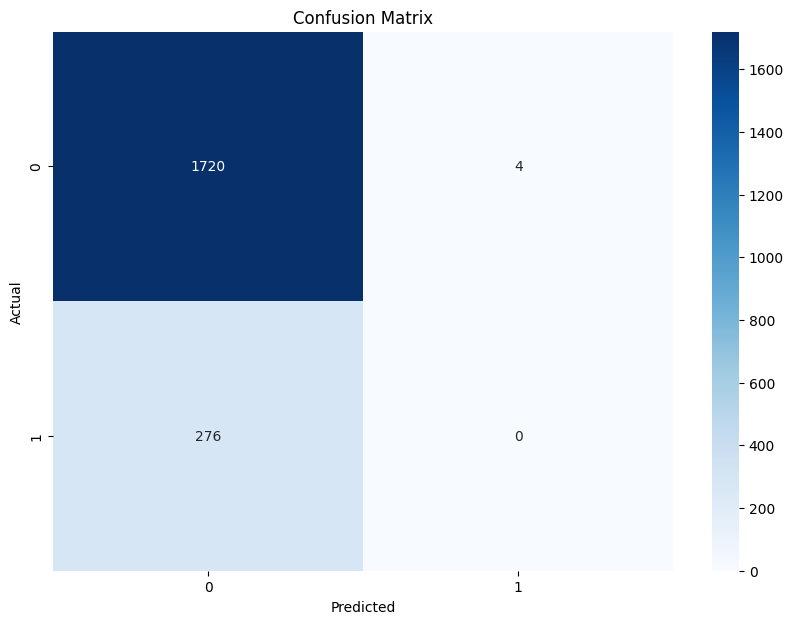

In [73]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

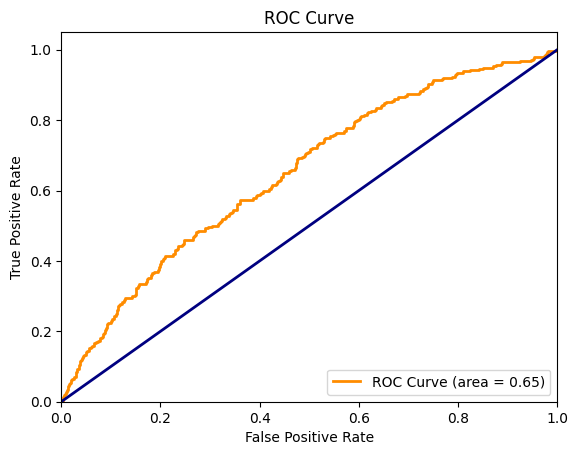

In [74]:
# 预测概率
y_pred_prob =logreg_model.predict_proba(X_test)[:, 1]

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

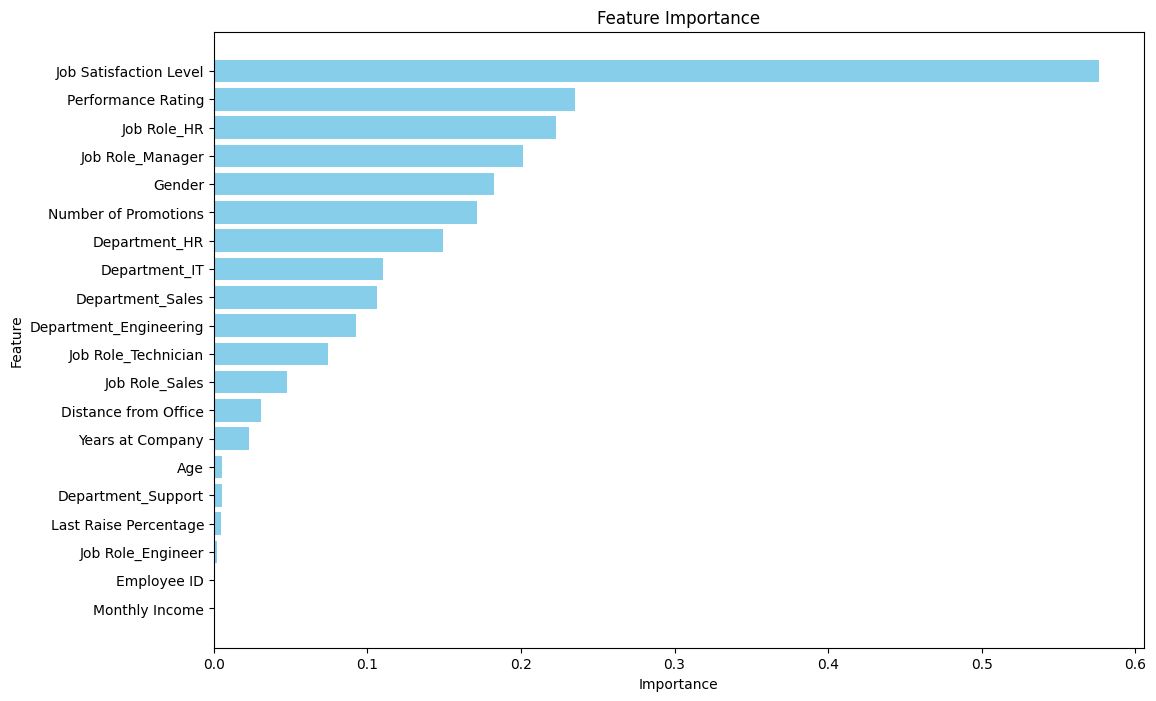

In [75]:
# 获取特征的重要性
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(logreg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 反转Y轴使重要性最高的特征在最上方
plt.show()

In [76]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用SMOTE来平衡数据
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 定义参数网格
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# 创建逻辑回归模型
logreg = LogisticRegression(max_iter=1000)

# 使用网格搜索调整模型参数
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# 最优参数
best_logreg_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 预测
y_pred_logreg = best_logreg_model.predict(X_test_scaled)
y_pred_prob = best_logreg_model.predict_proba(X_test_scaled)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Confusion Matrix:
[[1047  677]
 [ 106  170]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.61      0.73      1724
           1       0.20      0.62      0.30       276

    accuracy                           0.61      2000
   macro avg       0.55      0.61      0.52      2000
weighted avg       0.81      0.61      0.67      2000


Accuracy Score:
0.6085


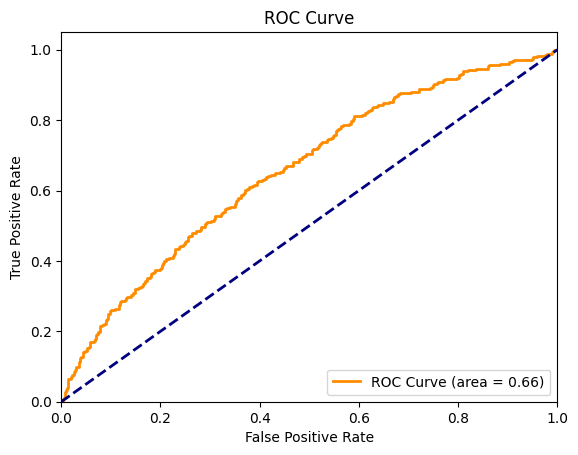

In [77]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 优化

In [78]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
# 创建逻辑回归模型
logreg = LogisticRegression(max_iter=1000)

# 使用网格搜索调整模型参数
grid_search = GridSearchCV(logreg, param_grid, cv=10, scoring='roc_auc', verbose=1)
grid_search.fit(X_train, y_train)

# 最优参数
best_logreg_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 预测
y_pred_logreg = best_logreg_model.predict(X_test)
y_pred_prob = best_logreg_model.predict_proba(X_test)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logreg))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_logreg))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_logreg))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was

In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(best_logreg_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.86  0.86  0.86  0.86  0.86  0.86  0.86  0.859 0.859 0.859]

Average Cross-Validation Score:
0.8596999999999999


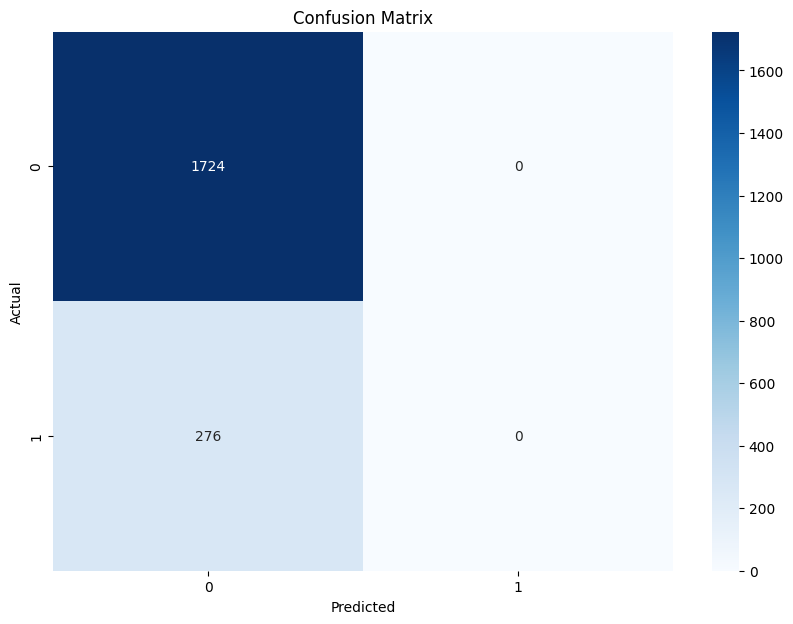

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


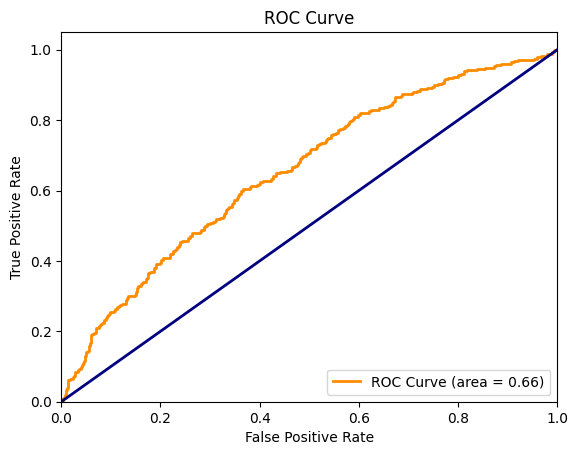

In [ ]:

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


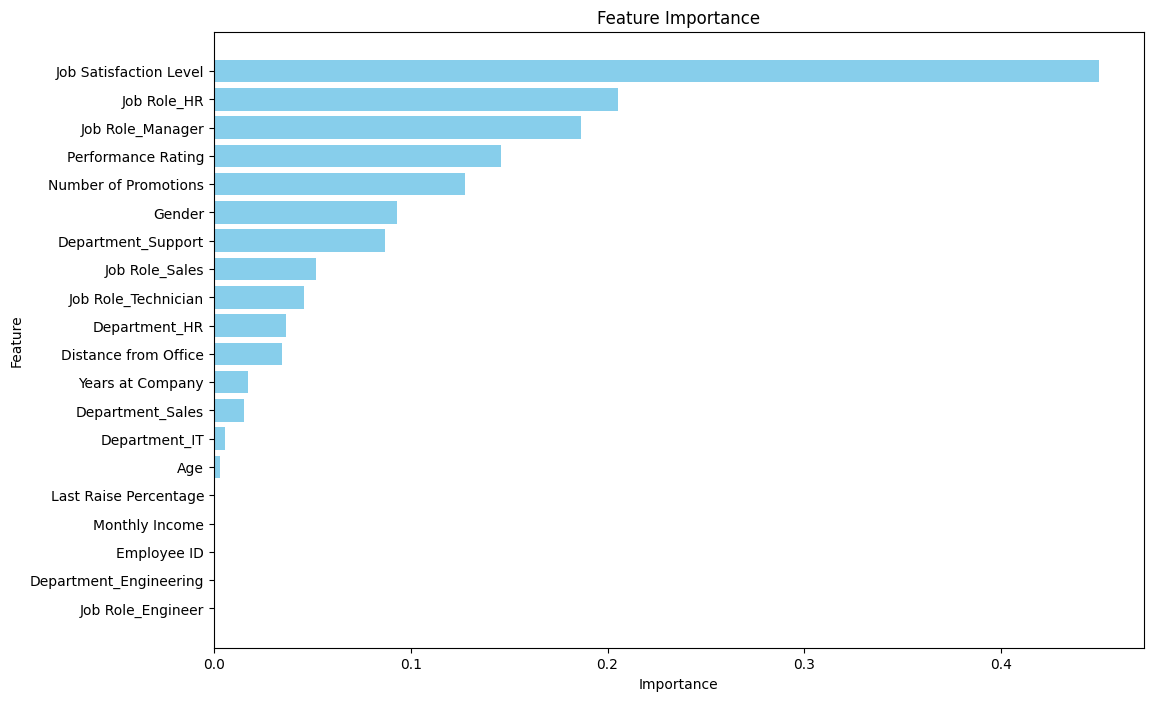

In [ ]:
# 获取特征的重要性
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(best_logreg_model.coef_[0])
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # 反转Y轴使重要性最高的特征在最上方
plt.show()


# 优化2

In [ ]:

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Train the best logistic regression model
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred_logistic = best_model.predict(X_test)
y_prob_logistic = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model on training data
y_train_pred = best_model.predict(X_train)
y_train_prob = best_model.predict_proba(X_train)[:, 1]

train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
train_roc_auc = auc(train_fpr, train_tpr)

print(f'Training ROC AUC: {train_roc_auc}')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the numb

Training ROC AUC: 0.9385833903598131


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

print(f'ROC AUC: {roc_auc}')

# Plot ROC curves for training and test sets
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print classification report for the test set
print("Logistic Regression Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

ValueError: Found input variables with inconsistent numbers of samples: [3439, 2000]

# Decision Tree

In [ ]:
# 创建并训练决策树模型
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 预测
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[1402  322]
 [ 220   56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1724
           1       0.15      0.20      0.17       276

    accuracy                           0.73      2000
   macro avg       0.51      0.51      0.50      2000
weighted avg       0.77      0.73      0.75      2000


Accuracy Score:
0.729


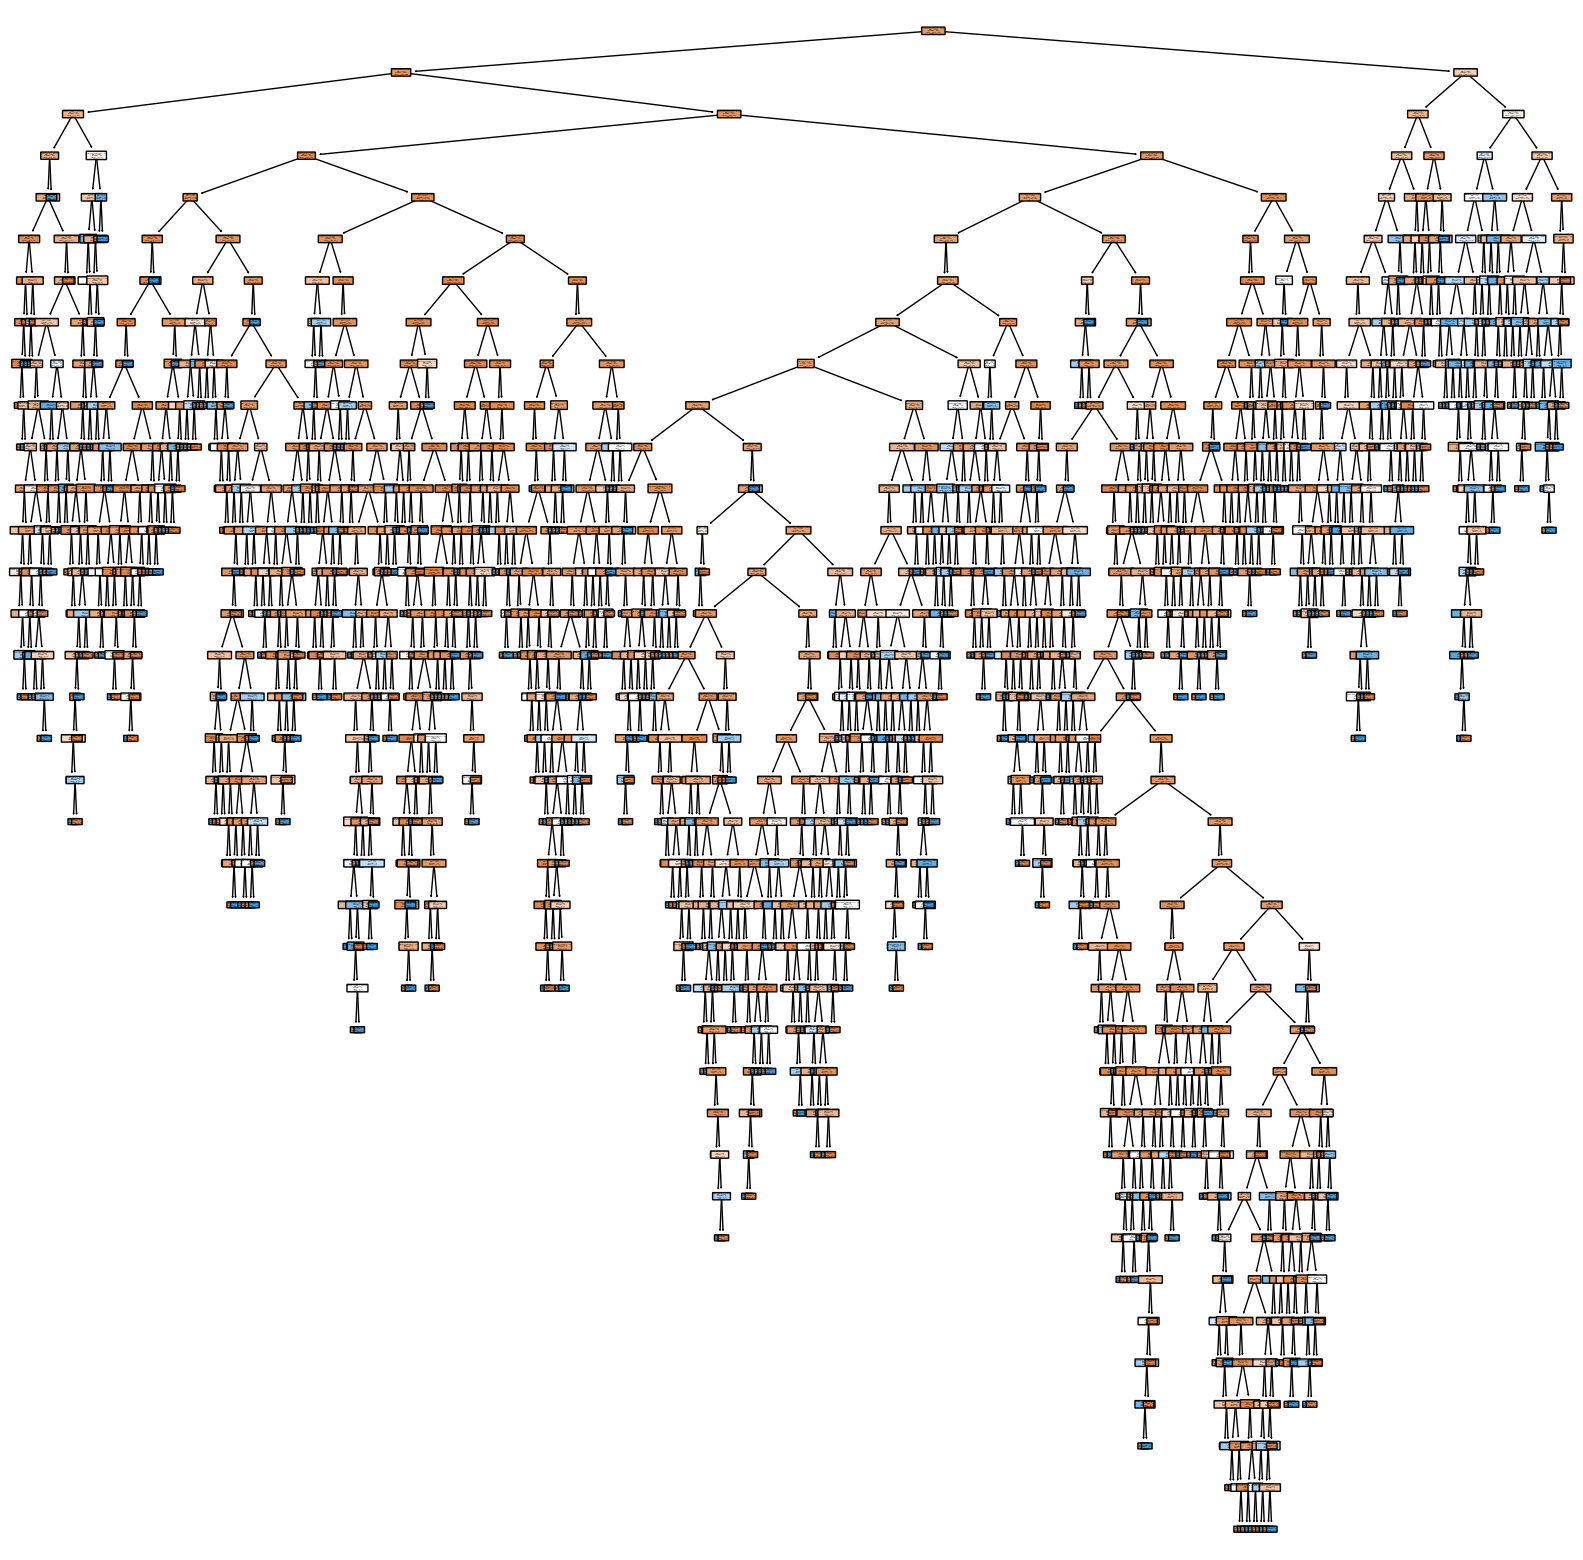

In [ ]:
plt.figure(figsize=(20,20))
plot_tree(dt_model, filled=True, rounded=True, class_names=['0','1'], feature_names=X.columns);

In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(dt_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.172 0.74  0.754 0.777 0.693 0.756 0.787 0.786 0.761 0.165]

Average Cross-Validation Score:
0.6391


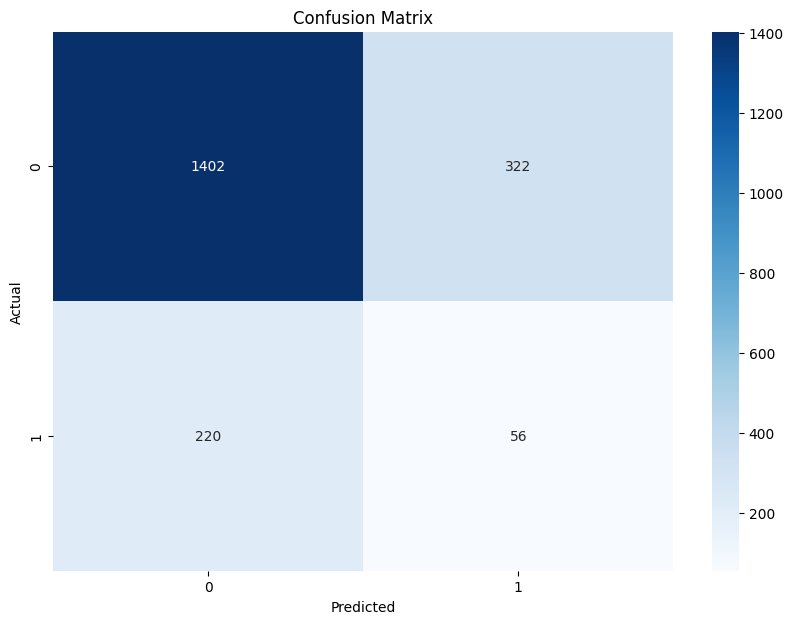

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

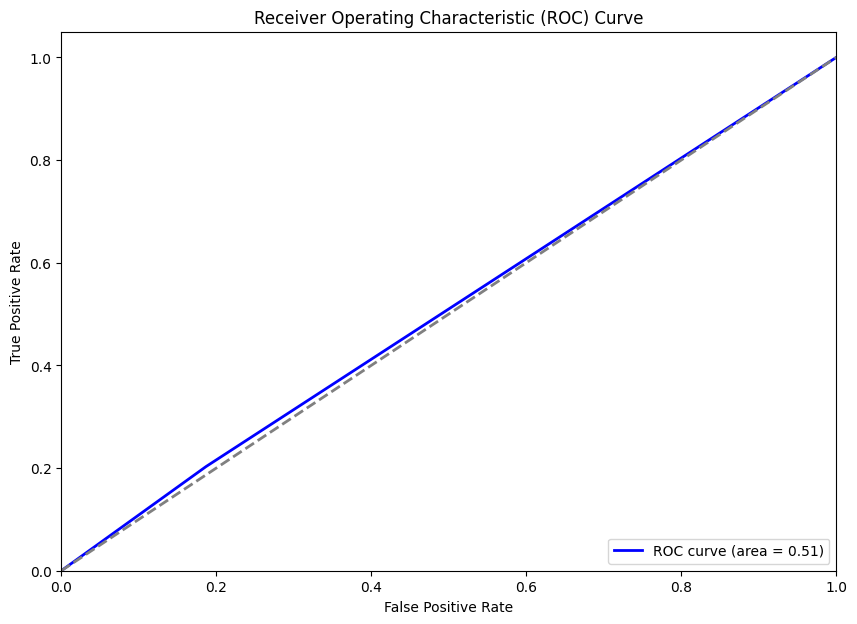

In [ ]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 可视化ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

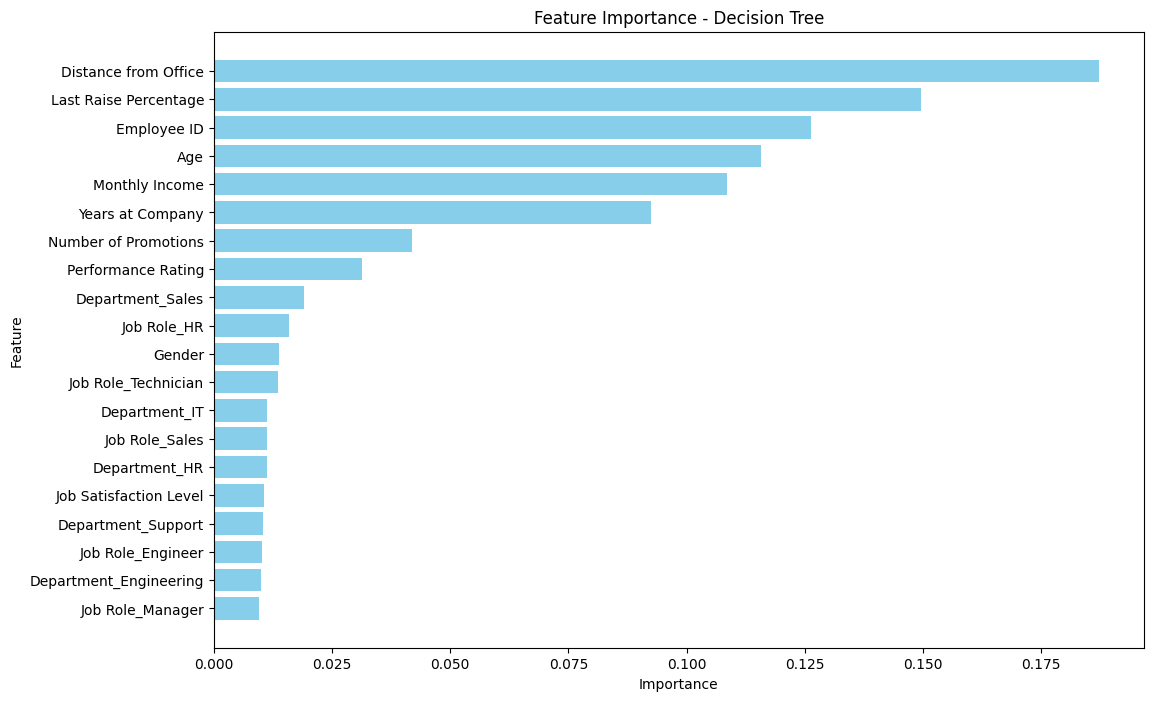

In [ ]:
# 获取特征的重要性
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # 反转Y轴使重要性最高的特征在最上方
plt.show()

# 优化

In [ ]:
# 定义参数网格
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# 创建决策树模型
dt_model = DecisionTreeClassifier(random_state=42)

# 使用网格搜索调整模型参数
grid_search = GridSearchCV(dt_model, param_grid, cv=10, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最优参数
best_dt_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 预测
y_pred = best_dt_model.predict(X_test)
y_pred_prob = best_dt_model.predict_proba(X_test)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Confusion Matrix:
[[1487  251]
 [ 325 1376]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1738
           1       0.85      0.81      0.83      1701

    accuracy                           0.83      3439
   macro avg       0.83      0.83      0.83      3439
weighted avg       0.83      0.83      0.83      3439


Accuracy Score:
0.8325094504216342


In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(best_dt_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())



Cross-Validation Scores:
[0.511 0.837 0.837 0.844 0.848 0.842 0.84  0.849 0.836 0.725]

Average Cross-Validation Score:
0.7968999999999999


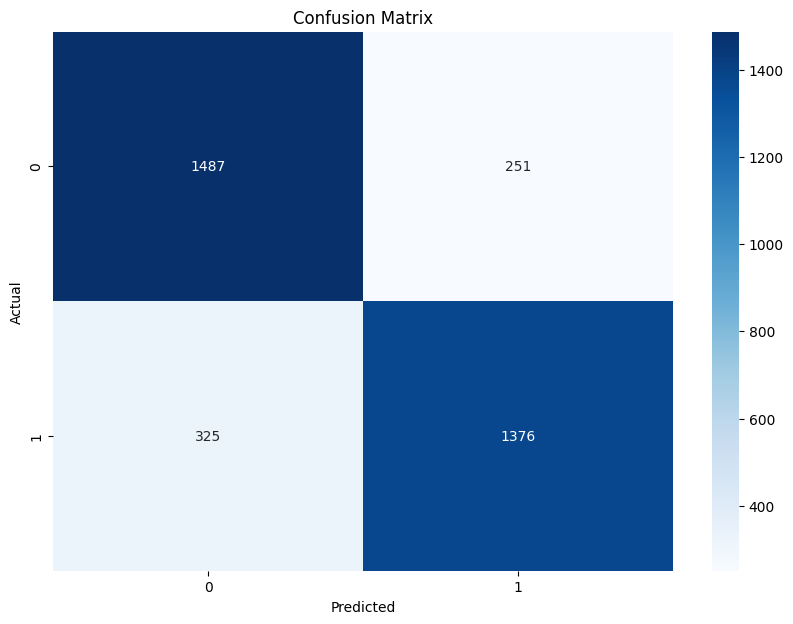

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


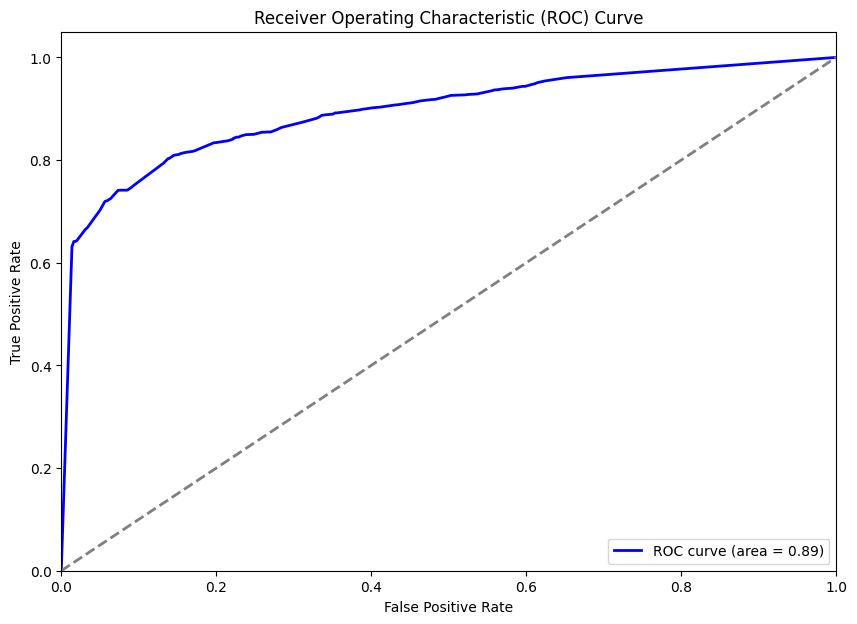

In [ ]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# 可视化ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

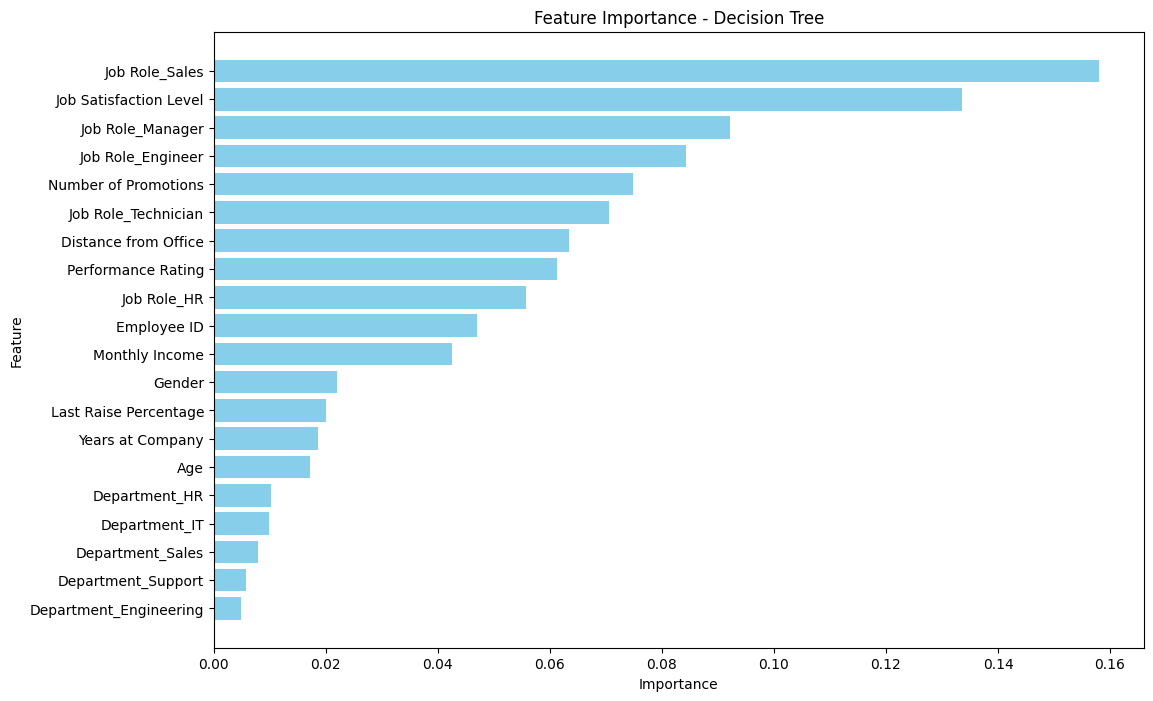

In [ ]:
# 获取特征的重要性
feature_importance_dt = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  # 反转Y轴使重要性最高的特征在最上方
plt.show()

# KNN

In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Cross-validation evaluation model
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {cv_scores.mean()}")

# Train the model
knn_model.fit(X_train, y_train)

# predict
y_pred_knn = knn_model.predict(X_test)
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Cross-Validation Scores: [0.667  0.819  0.837  0.8575 0.8555]
Mean Cross-Validation Score: 0.8071999999999999
Confusion Matrix:
[[1048  690]
 [ 276 1425]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.60      0.68      1738
           1       0.67      0.84      0.75      1701

    accuracy                           0.72      3439
   macro avg       0.73      0.72      0.72      3439
weighted avg       0.73      0.72      0.72      3439


Accuracy Score:
0.7191043908112823


In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(knn_model, X, y, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())


Cross-Validation Scores:
[0.767 0.799 0.844 0.821 0.811 0.832 0.848 0.846 0.855 0.823]

Average Cross-Validation Score:
0.8246


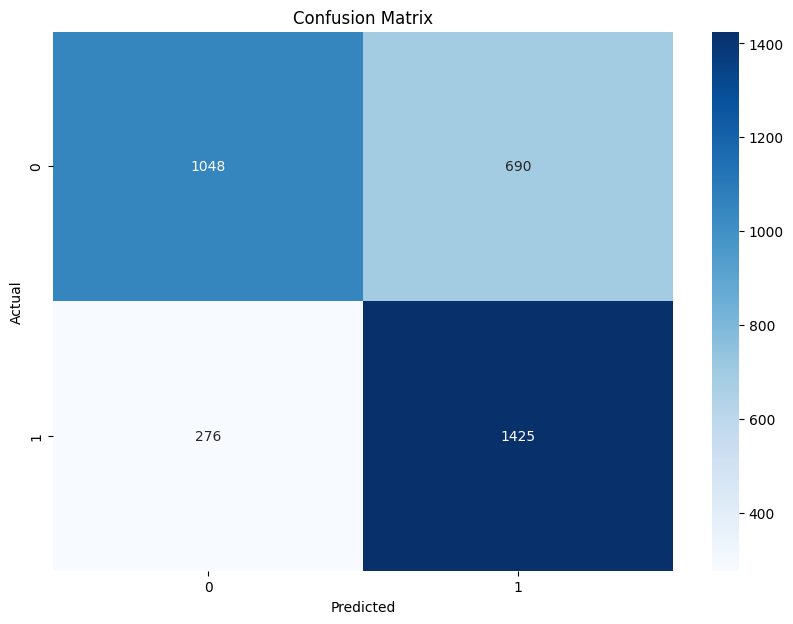

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

AUC Score: 0.89


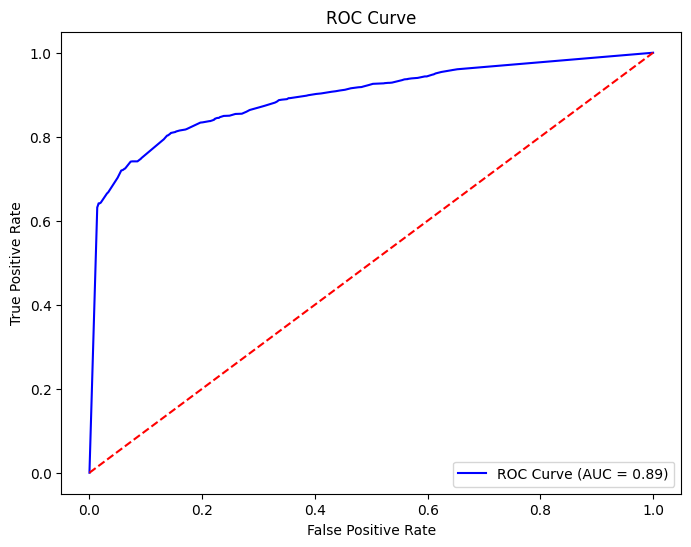

In [ ]:
# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

# Print AUC value
print(f"AUC Score: {auc_score:.2f}")

# Draw ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# SVC

In [ ]:
# 定义SVC模型
svc = SVC(probability=True, random_state=42)

# 训练模型
svc.fit(X_train, y_train)

# 预测
y_pred_svc = svc.predict(X_test)
y_pred_prob_svc = svc.predict_proba(X_test)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svc))



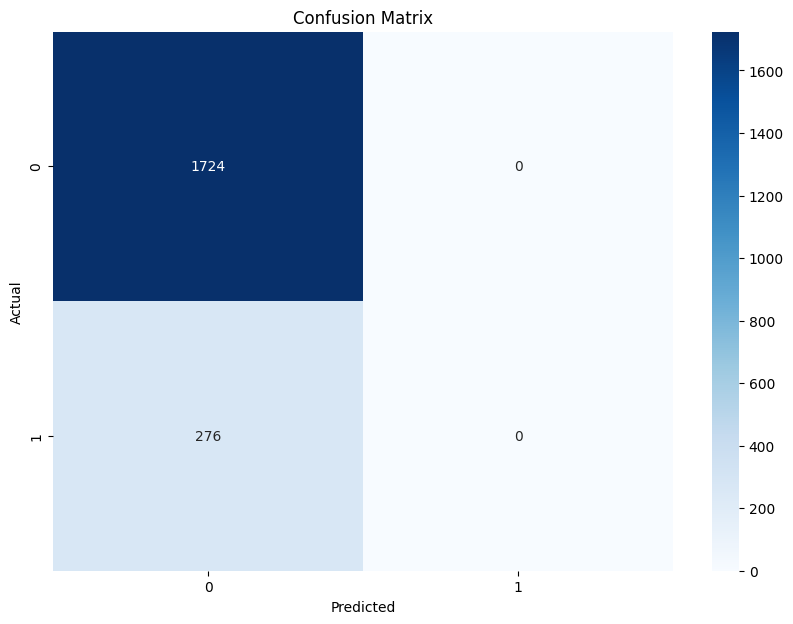

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

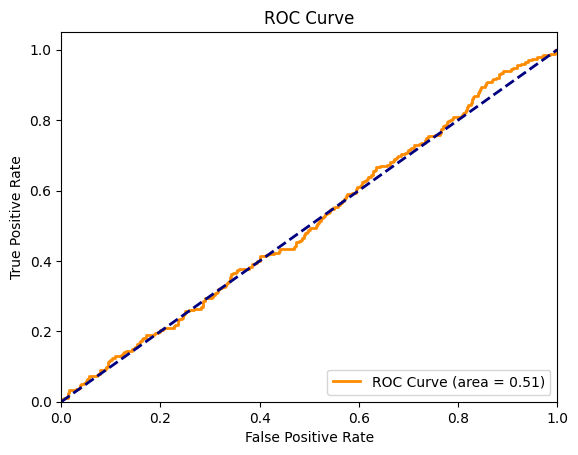

In [ ]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = roc_auc_score(y_test, y_pred_prob_svc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(svc, X_train, y_train, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())

NameError: name 'cross_val_score' is not defined

# 优化

In [ ]:
# 标准化特征
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 使用SMOTE来平衡数据
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

# 定义参数网格
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# 创建SVC模型
svc = SVC(probability=True, random_state=42)

# 使用网格搜索调整模型参数
grid_search = GridSearchCV(svc, param_grid, cv=10, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# 最优参数
best_svc_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# 预测
y_pred_svc = best_svc_model.predict(X_test_scaled)
y_pred_prob_svc = best_svc_model.predict_proba(X_test_scaled)[:, 1]

# 评估模型
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_svc))

In [ ]:
# 检查模型过拟合情况 - 交叉验证
cv_scores = cross_val_score(best_svc_model, X_train_balanced, y_train_balanced, cv=10)
print("\nCross-Validation Scores:")
print(cv_scores)
print("\nAverage Cross-Validation Score:")
print(cv_scores.mean())

In [ ]:
# 可视化混淆矩阵
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_svc)
roc_auc = roc_auc_score(y_test, y_pred_prob_svc)

# 可视化ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
